#### <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b>💕💔 Heart Disease<span style="color: black"> EDA & Prediction 🔮</span></b><br><span style="color: gray; font-size: 24px">making use of Various Machine Learning Models </span></h1>
<hr>
​

### <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction 👋</div>

##
<center>Heart Failure Prediction</center>

### Aim :
- To explore how the various feautures contribute to causing heart disease
- To classify / predict whether a patient is prone to heart failure based on certain feautures.
     
### <center>Dataset Feautures</center>
1. Age: age of the patient in years

2. Sex: sex of the patient
    * M: Male
    * F: Female
3. ChestPainType: The type of chest pain the patient experiences
    * TA: Typical Angina
    * ATA: Atypical Angina
    * NAP: Non-Anginal Pain
    * ASY: Asymptomatic
4. RestingBP:blood pressure measured at rest in mmHg
5. Cholesterol: serum cholesterol in mm/dl
6. FastingBS: fasting blood sugar 
    * 1: if FastingBS is higher than 120 mg/dl, 0: if FastingBS is lower than 120 mg/dl
7. RestingECG:electrocardiogram results taken at rest
    * Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina
    * Y: Yes,N: No
10. Oldpeak: oldpeak = ST Numeric value measured in depression
11. ST_Slope: the slope of the peak exercise ST segment 
    * Up: upsloping
    * Flat: flat
    * Down: downsloping
12. HeartDisease: the target- Whether a patient has heart disease or not
    * 1: heart disease
    * 0: Normal

###### <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">- Importing Necessary Libraries 📚</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">- Loading Dataset <div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The dataset would be read/loaded and an initial data exploration would be made <b></b>.
</div>

In [2]:
df = pd.read_csv('Heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


###### 
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>From the initial analysis, it was noted that:</b>
</div>
<div>1. The dataset has 918 observations and 12 features</div>
<div>2.They are no null values in the dataset</div>
<div>3. The data consists of both categorical and numeriacal features</div>


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Data Wrangling</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

</div>

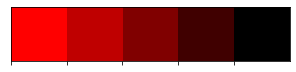

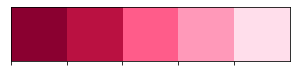

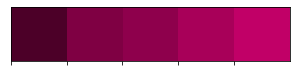

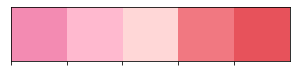

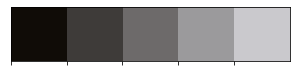

In [5]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

#### <center>Distinguishing the numerical and object variables</center>

In [6]:
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
object_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

## <div style="font-family: Trebuchet MS; background-color: pink; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Exploratory Data Analysis 📉</</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will make us understand the relationships between the various features in our data better.
</div>

In [7]:
    df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
858,62,F,ASY,140,268,0,LVH,160,N,3.6,Down,1
612,55,M,ASY,122,223,1,ST,100,N,0.0,Flat,1
754,57,M,ASY,132,207,0,Normal,168,Y,0.0,Up,0
481,69,M,NAP,140,0,1,ST,118,N,2.5,Down,1
768,64,F,ASY,130,303,0,Normal,122,N,2.0,Flat,0


####  To describe and check how the numerical feautures in our data are correlated generally and in respect to  "Heart Disease"

<AxesSubplot:>

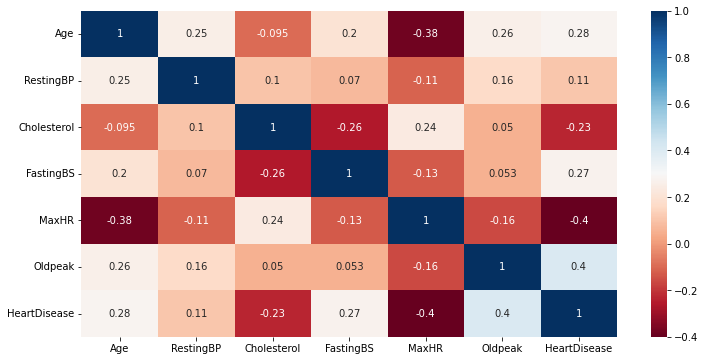

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap = 'RdBu',annot=True)

##### Correlation of the feautures with Heart Disease

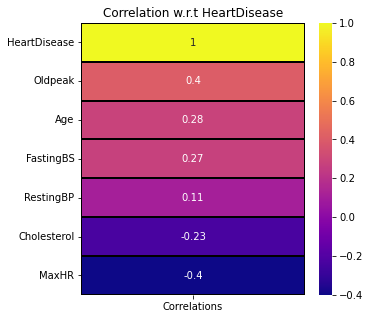

In [9]:
corr = df.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


##### <div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
</div>
    👉 <b>Comparing the mean Numerical values for when the Heart failure is positive or not</b>


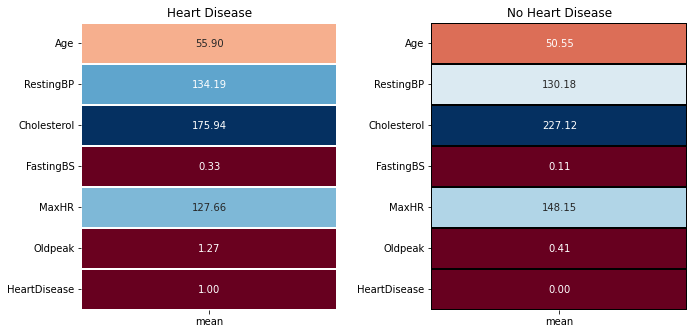

In [11]:
yes = df[df['HeartDisease'] == 1].describe().T
ye = df[df['HeartDisease'] == 1]
no = df[df['HeartDisease'] == 0].describe().T
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = 'RdBu',linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f')
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = 'RdBu',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease(Target)</div>

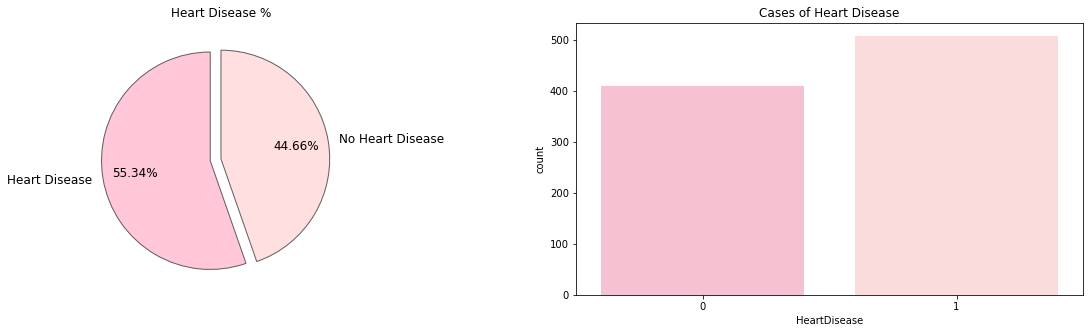

In [12]:
data = df.copy()
#colors = ['#F3ED13','#451FA4']
colors=color_mix[1:4]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(df['HeartDisease'].value_counts(),labels =['Heart Disease','No Heart Disease'] ,startangle = 90,explode = (0.1,0), colors=colors, pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),textprops={'fontsize':12})

#plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('Heart Disease %');

plt.subplot(1,2,2)
sns.countplot(x = 'HeartDisease',data = df,palette = colors)
plt.title('Cases of Heart Disease');
plt.show()

###### 
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>-56% of the observation have heart disease</div>
<div>- The target feauture is faily balanced</div>


#### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Gender and CHest Pain Distribution</div>

<AxesSubplot:xlabel='Sex', ylabel='count'>

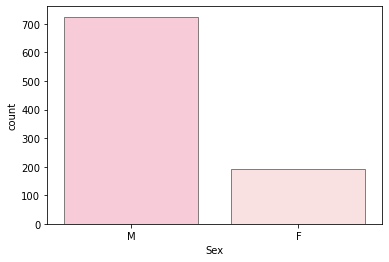

In [13]:
sns.countplot(x='Sex', data=df, palette=colors,edgecolor=black_grad[2], alpha=0.85)

<function matplotlib.pyplot.show(close=None, block=None)>

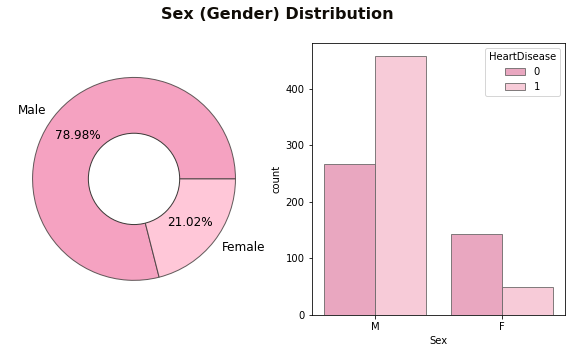

In [14]:
colors=color_mix[0:4]
#colors=black_grad[2:4]

plt.figure(figsize=(10, 5))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy',fontsize='16', fontfamily='sans-serif', color=black_grad[0])
plt.subplot(1, 2, 1)
plt.pie(df['Sex'].value_counts(), labels=['Male', 'Female'], colors=colors, pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

'''plt.subplot(1, 2, 2)
sns.countplot(x='Sex', data=df, palette=colors, order=order,edgecolor=black_grad[2], alpha=0.85)'''

plt.subplot(1, 2, 2)

sns.countplot(x='Sex', data=df, palette=colors,edgecolor=black_grad[2], alpha=0.85, hue='HeartDisease')
plt.show

<AxesSubplot:ylabel='Sex'>

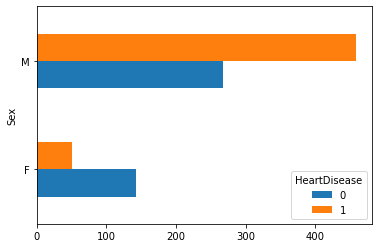

In [15]:
pd.crosstab(data.Sex, data.HeartDisease).plot(kind='barh')

<function matplotlib.pyplot.show(close=None, block=None)>

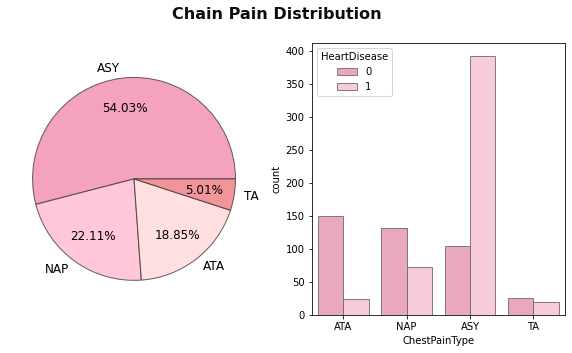

In [16]:

plt.figure(figsize=(10, 5))
plt.suptitle('Chain Pain Distribution', fontweight='heavy',fontsize='16', fontfamily='sans-serif', color=black_grad[0])
plt.subplot(1, 2, 2)

sns.countplot(x='ChestPainType', data=df, palette=colors,edgecolor=black_grad[2], alpha=0.85, hue='HeartDisease')
plt.subplot(1, 2, 1)
plt.pie(df['ChestPainType'].value_counts(), labels=['ASY', 'NAP','ATA','TA'], colors=colors, pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),textprops={'fontsize':12})
plt.show

###### 
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>- They are more males in the observation than they are females in the ration 78:22; makes our data skewed towards males</div>
<div>- More males are found to have heart failure from the observations</div>
<div>- Asymptomatic Chest pain is more observed generally and this trend also is highly noticed that most heart failure patients would largely experience asymptomaytic chest pain </div>

## 
<div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Distribution of Numerical Variables : 🔢</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The section would explore the numerical variables of the dataset</b>.
</div>


In [17]:
print('\033[1m'+'.: Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)

for i in range(len(numeric_cols) - 1):
    title =  numeric_cols[i]
    # --- Skewness & Kurtosis ---
    print(title)
    print('Skewness:'+'\033[1m {:.3f}'.format(df[numeric_cols[i]].skew(axis = 0, skipna = True)))
    print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[numeric_cols[i]].kurt(axis = 0, skipna = True)))
   # print('\n')
   

.: Skewness & Kurtosis :.
*********************************************
Age
Skewness: -0.196
Kurtosis: -0.386
RestingBP
Skewness: 0.180
Kurtosis: 3.271
Cholesterol
Skewness: -0.610
Kurtosis: 0.118
FastingBS
Skewness: 1.264
Kurtosis: -0.402
MaxHR
Skewness: -0.144
Kurtosis: -0.448
Oldpeak
Skewness: 1.023
Kurtosis: 1.203


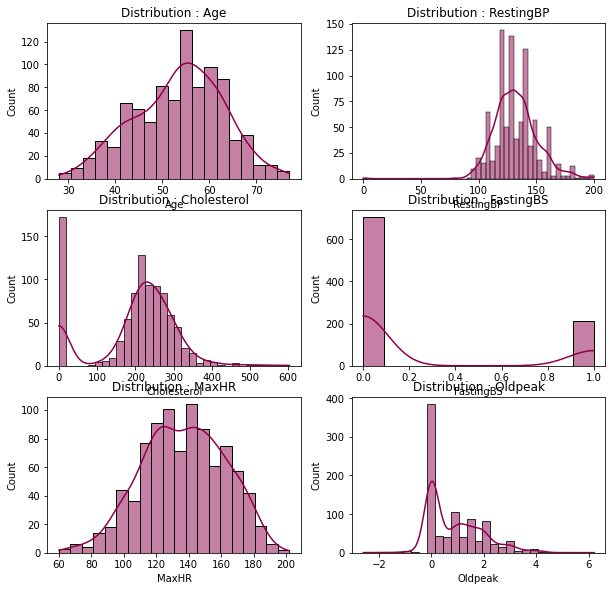

In [18]:
color = purple_grad[2]

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numeric_cols) - 1):
    plt.subplot(3,2,i+1)
    #sns.histplot(df[numeric_cols[i]],palette = colors)
    sns.histplot(data=df, x=numeric_cols[i], kde=True, color=color)

    title = 'Distribution : ' + numeric_cols[i]
    plt.title(title)
    #print(' ' * 10)
plt.show()



###### 
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>- Age's data distribution is normally distributed.</div>

<div>- Oldpeak's data distribution is rightly skewed.</div>
<div>- Cholestrol has a bidmodal data distribution. </div>

## 
<div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Distribution of Categorical Variables : </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The section would explore the categorical variables of the dataset</b>.
</div>


 #### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Categorical Features vs Target Variable (HeartDisease) :</div>

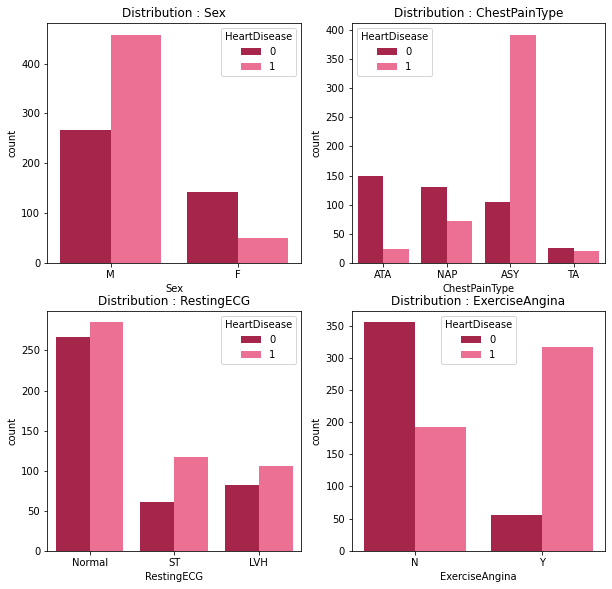

In [19]:
colors=pink_grad[1:4]

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,15))
for i in range(len(object_cols) - 1):
    plt.subplot(3,2,i+1)    
    sns.countplot(x = object_cols[i],data = df,hue = "HeartDisease",palette = colors)
    title = 'Distribution : ' + object_cols[i]
    plt.title(title);

In [20]:
object_cols


['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

##### 
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>-Ecg taken at rest is seen to be mostly normal in the observations and is also more evidenced in the Heart Failure patients.Regardless, HF patients are more regarless of the resting ECG value/div>

<div>- Heart failure patients experience more of excercise induced angina.</div>
<div>-  </div>

 #### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Categorical Feautures vs Positive Heart Failure Cases</div>

###### This section explores how the categorical features relate with the positive Heart failure  cases

In [21]:

sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

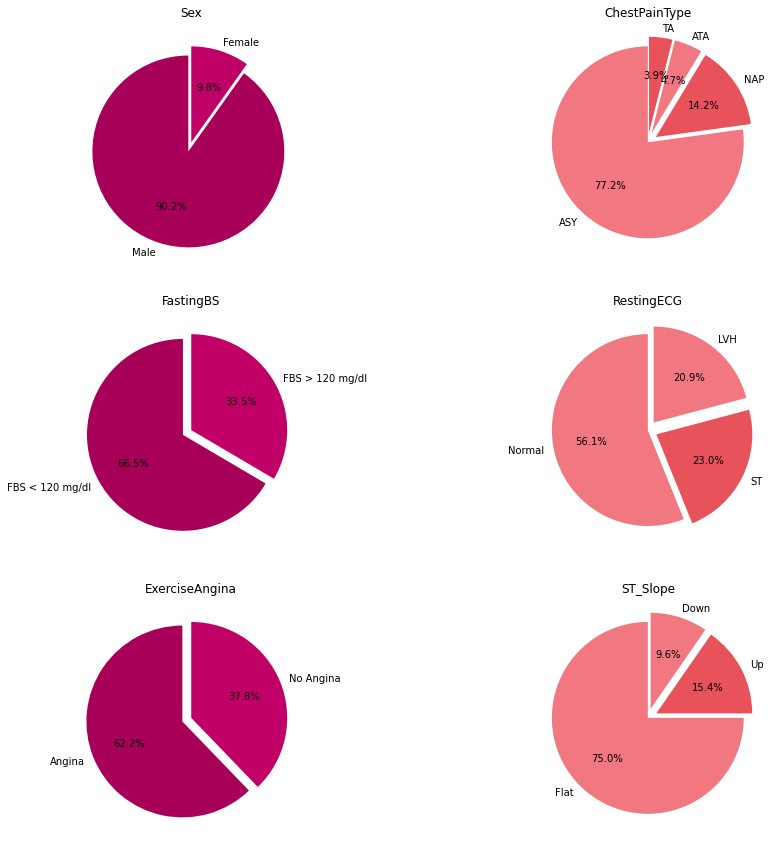

In [22]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))
#colors = ['#F3ED13','#451FA4']
colors=purple_grad[3:5]
#colors1=red_grad[0:4]
colors1=color_mix[3:5]




plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),colors = colors1)
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),colors = colors1)
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),colors = colors1)
plt.title('ST_Slope');

##### 
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>- Out of all the heart disease patients, a staggering 90% patients are <b>males</b>.</div>

<div>-  Regarding the type of chest pain, <b>Asymptomatic</b> chest pain- is experienced by majority -77% of the Heart Failure Patients.</div>
<div>- Surprisingly,<b>Fasting Blood Sugar</b> levels less than 120 mg/dl is observed in more of the heart failure cases</div>
<div>- A normal resting <b>ECG</b> is observed in more of the heart failure patients.</div>
<div>-When it comes to <b>ST_Slope</b> readings, <b>Flat</b> level holds a massive chunk with 75% that may assist in detecting underlying heart problems. </div>


In [23]:
numeric_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

##### Rescaling the numerical variables because of the large apart data points

In [24]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]
data['FastingBS_Group'] = [ int( (i*10) / 5) for i in data['FastingBS']]

ValueError: Could not interpret input 'HeartDisease_Group'

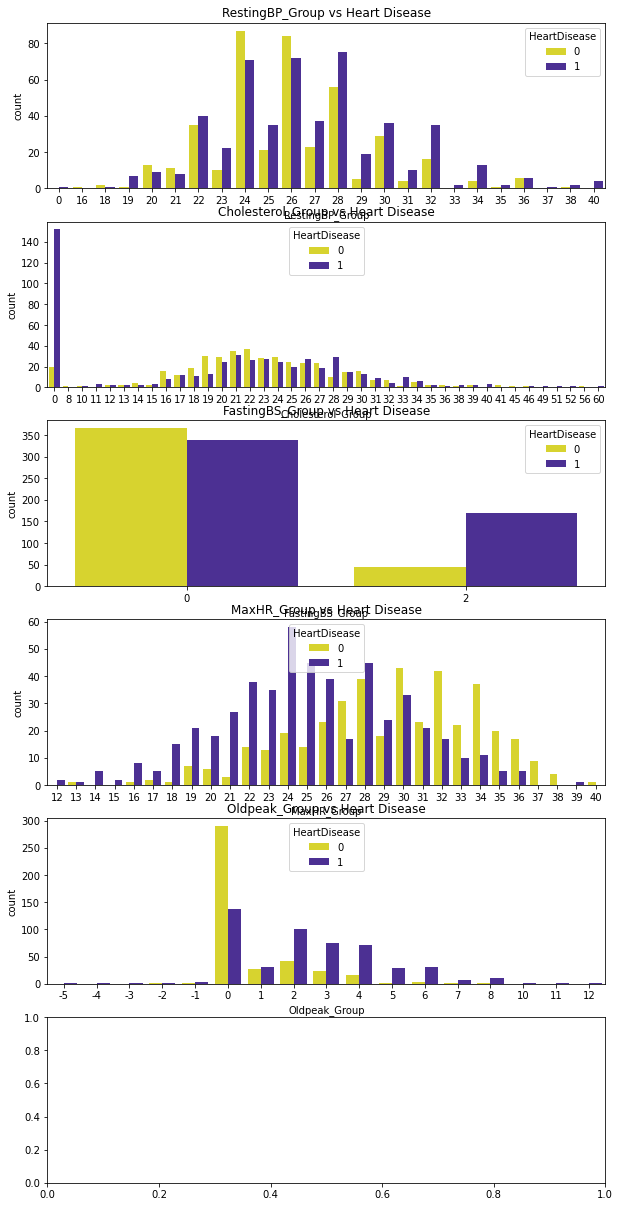

In [25]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
colors = ['#F3ED13','#451FA4']
group_numerical_features = [i + '_Group' for i in numeric_cols[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(7,1,i+1)
    sns.countplot(x = group_numerical_features[i],data = data,hue = "HeartDisease",palette = colors)
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

##   <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Numerical features vs Categorical features w.r.t Target variable(HeartDisease) :</div>
This section 

  #### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Sex vs Numerical Features </div>

In [ ]:
#colors = ['#F3ED13','#451FA4']
colors = ['pink','blue']
#colors = color_mix[0]
#colors=purple_grad[0:5]



fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs Sex' 
    plt.title(title);

##### 
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>- <b>Male</b> population displays heart diseases at near about all the values of the numerical features. Above the age of 50, positive old peak values and maximum blood pressure above 140, heart diseases in male population become dense.</div>

<div>- <b>Female</b> population data points are generally very less as compared to male population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases.</div>



  #### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> ChestPainType vs Numerical Features :</div>

In [ ]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ChestPainType' 
    plt.title(title);

##### 
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>-  As expected, <b>Asymptomatic</b> type of chest pain dominates other types of chest pain in all the numerical features by a lot.</div>

<div>- It is also noticed that above above the age 50, <b>Non Anginal pain</b>  is noticed by the heart failure patients.</div>
<div>- <b>Cholesterol</b> levels above 200 are noticed in more of the heart failure patients regardless of the type of chest pain they established.</div>







  #### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> FastingBS vs Numerical features :</div>

In [ ]:
colors = ['pink','blue']

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

###### 
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>- <b>As already established, FBS less than 120mg/dl is confusingly seen in more-66.5% of the Heart Failure Patients, but from this analysis, we notice that:</b> </div>

<div>- The possibility of having Heart Disease is noticed more in <b>FBS</b> greater than 120mg/dl regardless of the age of the patient.
.</div>
<div>- Positive Heart Disease data points are more dense with increasing<b>Cholesterol levels and FBS</b>   more than 120mg/dl .</div>
<div>- Positive Heart Disease data points are more dense with <b> increasing resting BP levels and FBS </b> more than 120mg/dl .</div>









#### 
  #### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Resting ECG vs Numerical features :</div>

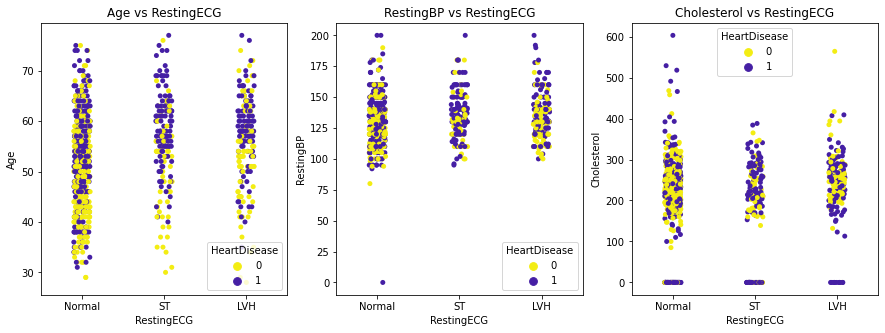

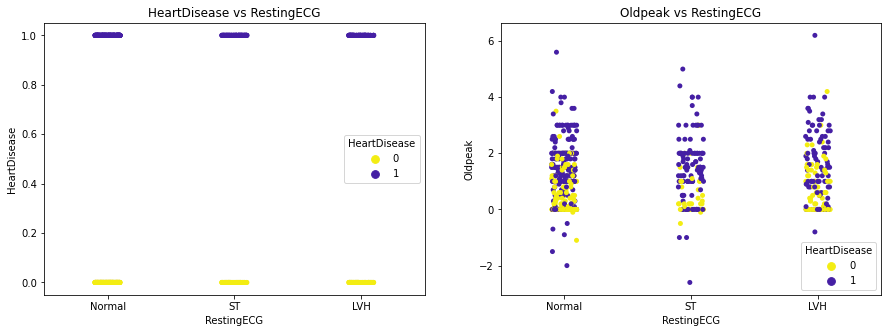

In [26]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs RestingECG' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs RestingECG'
    plt.title(title);

##### 
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>- <b>As already established, 56.1% of the HF patients have a normal resting ECG, but from this analysis, we notice that:</b> </div>
<div>- Heart diseases are found consistently throughout any values of <b>RestingBP and RestingECG.</b></div>
<div>- ST abnormality and LVH has <b>more dense data points</b> with increasing Age,Resting BP and Cholesterol levels.
.</div>
<div>- <b>Cholesterol values</b> between 200 - 300 coupled with ST value of RestingECG display a patch of patients suffering from heart diseases.
</div>












  #### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> ExerciseAngina vs Numerical Features :</div>

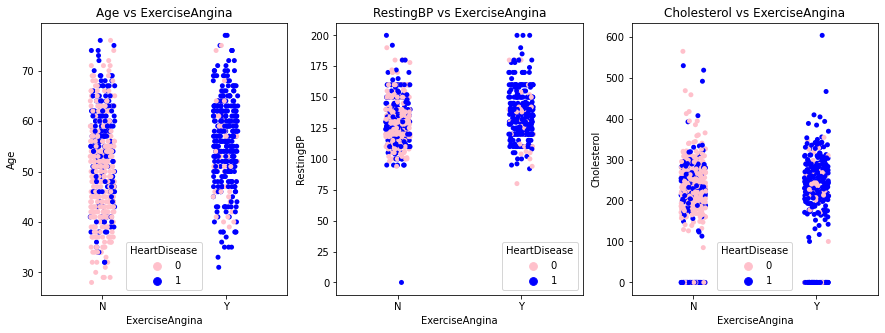

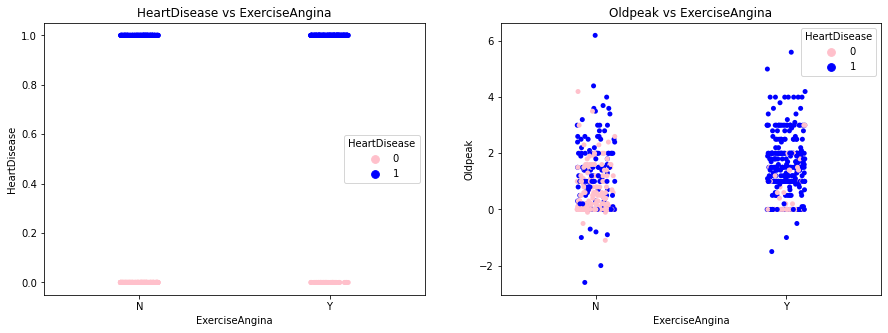

In [27]:
colors = ['pink','blue']

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ExerciseAngina' 
    plt.title(title);

 ##### 
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>- Heart Failure increases with <b>increasing age and excercise induced angina</b></div>
<div>- Heart Failure increases with <b>increasing resting BP values and excercise induced angina</b>
<div>- Heart Failure increases with <b>increasing cholesterols and excercise induced angina</b></div>
<div>- Heart Failure increases with <b>increasing old Peak and excercise induced angina</b></div>







  #### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> ST_Slope vs Numerical Features :</div>

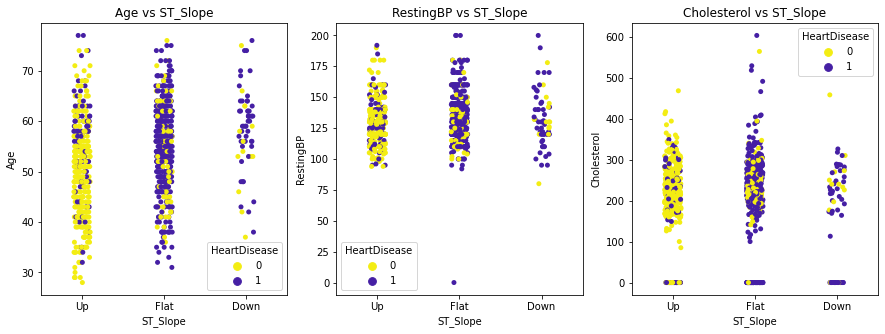

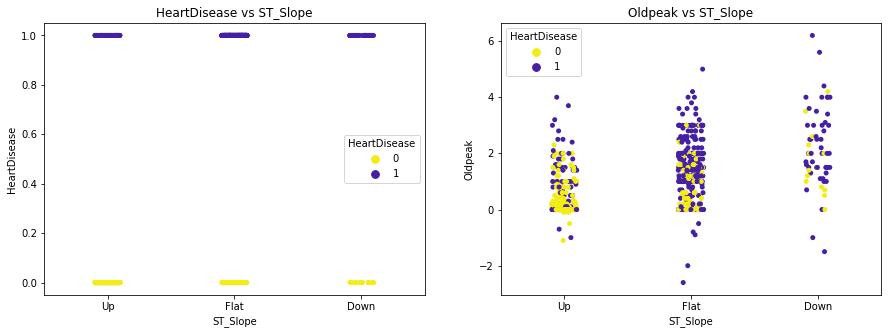

In [28]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numeric_cols[i],data = data,hue = 'HeartDisease',palette = colors);
    title = numeric_cols[i] + ' vs ST_Slope'
    plt.title(title);

#####  
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observations</div>
<div>- It is generally noticed that ST_slope levels in Heart Disease patients are Flat</b></div>
<div>- Heart Failure is seen with increasing Age, Resting BP, Cholestewrol and more in Down ST_slope than Up sT slope</b>




In [29]:
### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

ValueError: num must be 1 <= num <= 10, not 11

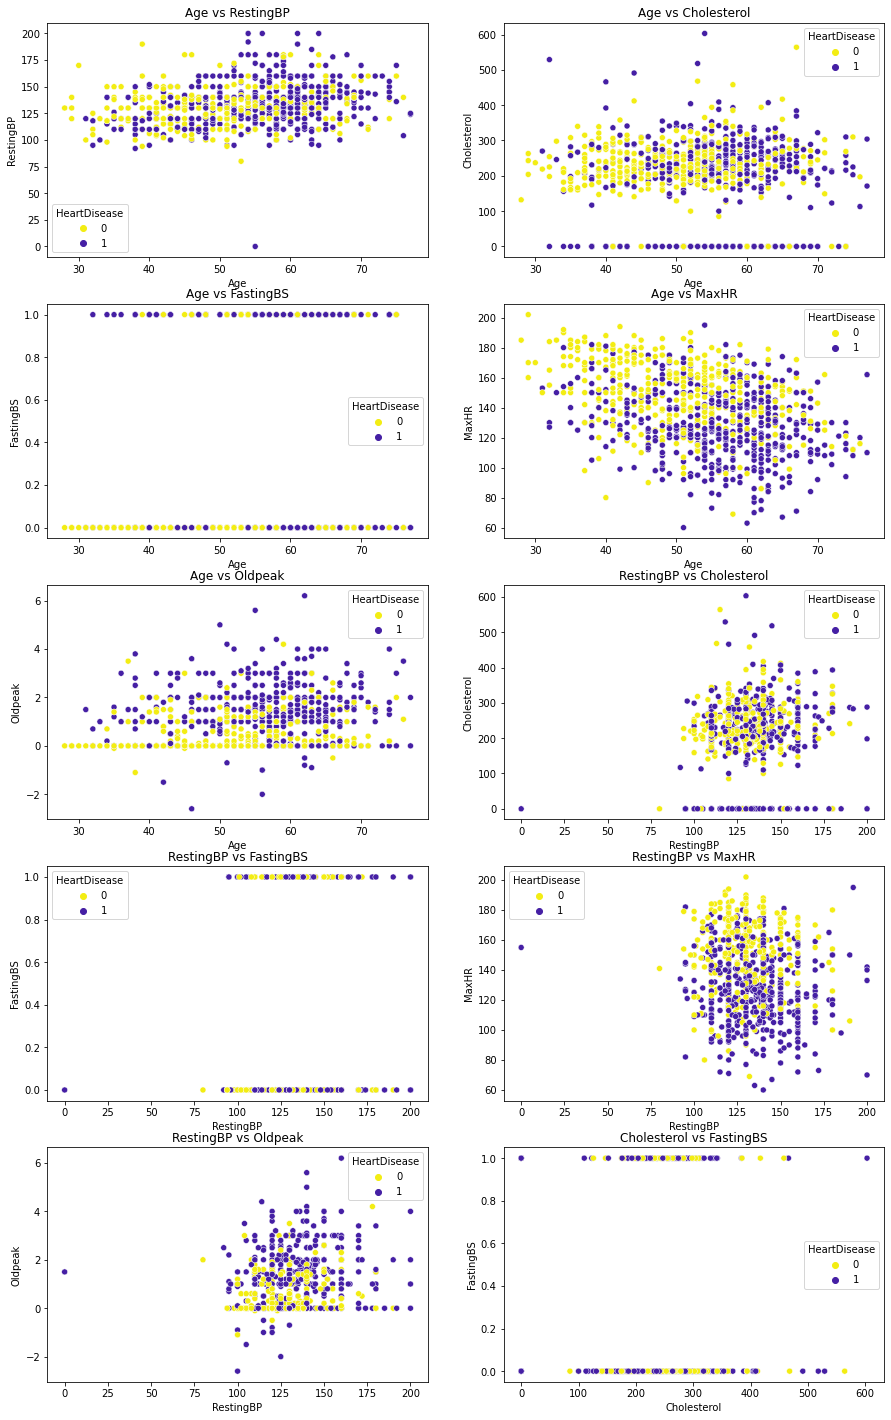

In [30]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numeric_cols) - 1):
    for j in range(len(numeric_cols)-1):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numeric_cols[i],y = numeric_cols[j],data = data,hue = 'HeartDisease',palette = colors);
            title = numeric_cols[i] + ' vs ' + numeric_cols[j]
            plt.title(title)

In [ ]:
pd.crosstab(data.Age, data.HeartDisease).plot(kind='bar')

##### From the above it is seen that heart disease increase with increasing age

#  <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">-FEAUTURE ENGINEERING<div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The dataset would go through feauture engineering in prepation for meodelling <b></b>.
</div>

###### 

  <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Scaling of the Numerical Features:</div>

In [32]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1 = df.copy()

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,0,Normal,1.382928,N,0.295455,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,0,Normal,0.754157,N,0.409091,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,0,ST,-1.525138,N,0.295455,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,0.465909,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,0.295455,Up,0


###### 
Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl 

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Oldpeak** feature is normalized as it had displayed a right skewed data distribution.
- **Standardizarion** : **Age**, **RestingBP**, **Cholesterol** and **MaxHR** features are scaled down because these features are normally distributed.


###### 

  <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> ENCODING THE OBJECT COLUMNS:</div>

In [33]:
object_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [34]:
from sklearn.preprocessing import OrdinalEncoder
# Apply ordinal encoder 
ordinal_encoder = OrdinalEncoder()
df1[object_cols] = ordinal_encoder.fit_transform(df1[object_cols])
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1.0,1.0,0.410909,0.825070,0,1.0,1.382928,0.0,0.295455,2.0,0
1,-0.478484,0.0,2.0,1.491752,-0.171961,0,1.0,0.754157,0.0,0.409091,1.0,1
2,-1.751359,1.0,1.0,-0.129513,0.770188,0,2.0,-1.525138,0.0,0.295455,2.0,0
3,-0.584556,0.0,0.0,0.302825,0.139040,0,1.0,-1.132156,1.0,0.465909,1.0,1
4,0.051881,1.0,2.0,0.951331,-0.034755,0,1.0,-0.581981,0.0,0.295455,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1.0,3.0,-1.210356,0.596393,0,1.0,-0.188999,0.0,0.431818,1.0,1
914,1.536902,1.0,0.0,0.627078,-0.053049,1,1.0,0.164684,0.0,0.681818,1.0,1
915,0.370100,1.0,0.0,-0.129513,-0.620168,0,1.0,-0.857069,1.0,0.431818,1.0,1
916,0.370100,0.0,1.0,-0.129513,0.340275,0,0.0,1.461525,0.0,0.295455,1.0,1


In [36]:
df1.ST_Slope.value_counts()

1.0    460
2.0    395
0.0     63
Name: ST_Slope, dtype: int64

#### -
-- **Now that our feautures are now all numerical,Lets Check how they are correlated to the Target Variable**

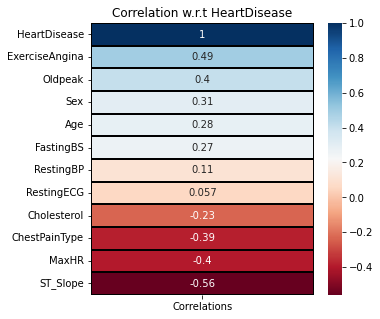

In [37]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'RdBu',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

###### 
###### 

  <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> FEAUTURE SELECTION:</div>

In [38]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [39]:
from sklearn.feature_selection import mutual_info_regression


X = df1.copy()
y = X.pop('HeartDisease')

mi_scores = make_mi_scores(X, y)


In [40]:
mi_scores

ST_Slope          0.236327
ChestPainType     0.152662
ExerciseAngina    0.125593
Oldpeak           0.115962
MaxHR             0.103672
Cholesterol       0.064797
FastingBS         0.050538
Age               0.045598
Sex               0.038507
RestingBP         0.004718
RestingECG        0.000000
Name: MI Scores, dtype: float64

######  
<div style="font-family: Trebuchet MS; background-color: gray; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Observation</div>
<div>- BOTH CORRELATION AND MUTUAL INFORMATION SUGGEST THE RESTING ECG COLUMN IS DROPPED As IT HAS A VERY LOW CORRELATION AND MI
</b></div>


In [41]:
X = X.drop(columns = ['RestingECG'])

### SPLITTING INTO TEST AND TRAIN

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((642, 10), (276, 10), (642,), (276,))

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">-MODELLING<div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉  <b>Modelling with various machine learning models</b>.
</div>


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [46]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[],'RMSE':[]}
result=pd.DataFrame(a)


Model Name:  LogisticRegression(max_iter=1000, penalty='l1', random_state=1,
                   solver='liblinear')
Confusion matrix : 
 [[141  23]
 [ 12 100]]
Outcome values : 
 141 23 12 100
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.86      0.89       164
           0       0.81      0.89      0.85       112

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276

0.12681159420289856
Accuracy : 87.32 %
Precision : 92.2 %
Recall : 86.0 %
F1 Score : 0.89
Specificity or True Negative Rate : 89.3 %
Balanced Accuracy : 87.6 %
MCC : MCC
roc_auc_score: 0.876


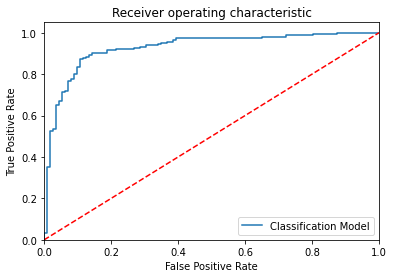

-----------------------------------------------------------------------------------------------------


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1861072184.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


Model Name:  DecisionTreeClassifier(max_depth=4, random_state=1000)
Confusion matrix : 
 [[142  22]
 [ 21  91]]
Outcome values : 
 142 22 21 91
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.87      0.87       164
           0       0.81      0.81      0.81       112

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

0.15579710144927536
Accuracy : 84.42 %
Precision : 87.1 %
Recall : 86.6 %
F1 Score : 0.869
Specificity or True Negative Rate : 81.2 %
Balanced Accuracy : 83.9 %
MCC : MCC
roc_auc_score: 0.839


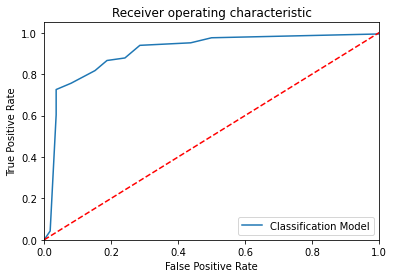

-----------------------------------------------------------------------------------------------------


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1861072184.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


Model Name:  RandomForestClassifier(max_depth=4, max_leaf_nodes=20, min_samples_split=15,
                       n_estimators=1000, random_state=0)
Confusion matrix : 
 [[147  17]
 [ 15  97]]
Outcome values : 
 147 17 15 97
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.90      0.90       164
           0       0.85      0.87      0.86       112

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

0.11594202898550725
Accuracy : 88.41 %
Precision : 90.7 %
Recall : 89.6 %
F1 Score : 0.902
Specificity or True Negative Rate : 86.6 %
Balanced Accuracy : 88.1 %
MCC : MCC
roc_auc_score: 0.881


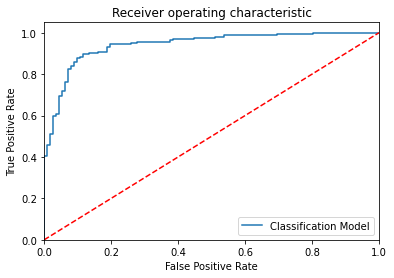

-----------------------------------------------------------------------------------------------------


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1861072184.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[143  21]
 [ 11 101]]
Outcome values : 
 143 21 11 101
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.87      0.90       164
           0       0.83      0.90      0.86       112

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276

0.11594202898550725
Accuracy : 88.41 %
Precision : 92.9 %
Recall : 87.2 %
F1 Score : 0.899
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 88.7 %
MCC : MCC
roc_auc_score: 0.887


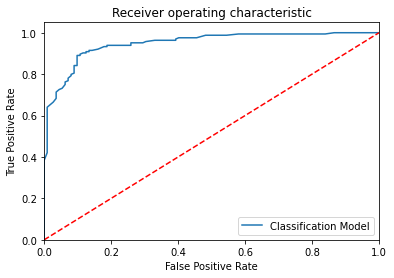

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)
Confusion matrix : 
 [[144  20]
 [ 17  95]]
Outcome values : 
 144 20 17 95
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.88      0.89       164
           0       0.83      0.85      0.84       112

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276

0.13405797101449277
Accuracy : 86.59 %
Precision : 89.4 %
Recall : 87.8 %
F1 Score : 0.886
Specificity or True Negative Rate : 84.8 %
Balanced Accuracy : 86.3 %
MCC : MCC
roc_auc_score: 0.863


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1861072184.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


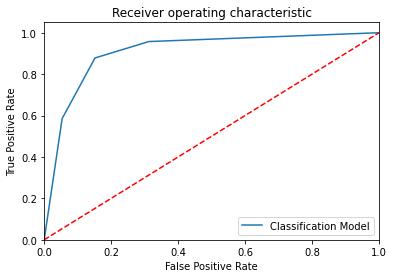

-----------------------------------------------------------------------------------------------------


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1861072184.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


Model Name:  SVC(probability=True)
Confusion matrix : 
 [[144  20]
 [ 16  96]]
Outcome values : 
 144 20 16 96
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.88      0.89       164
           0       0.83      0.86      0.84       112

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

0.13043478260869565
Accuracy : 86.96 %
Precision : 90.0 %
Recall : 87.8 %
F1 Score : 0.889
Specificity or True Negative Rate : 85.7 %
Balanced Accuracy : 86.7 %
MCC : MCC
roc_auc_score: 0.868


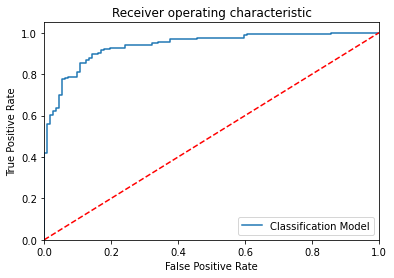

-----------------------------------------------------------------------------------------------------


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1861072184.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[134  30]
 [ 16  96]]
Outcome values : 
 134 30 16 96
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.82      0.85       164
           0       0.76      0.86      0.81       112

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276

0.16666666666666666
Accuracy : 83.33 %
Precision : 89.3 %
Recall : 81.7 %
F1 Score : 0.854
Specificity or True Negative Rate : 85.7 %
Balanced Accuracy : 83.7 %
MCC : MCC
roc_auc_score: 0.837


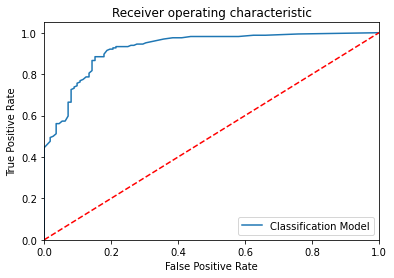

-----------------------------------------------------------------------------------------------------


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1861072184.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[139  25]
 [ 13  99]]
Outcome values : 
 139 25 13 99
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.85      0.88       164
           0       0.80      0.88      0.84       112

    accuracy                           0.86       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276

0.13768115942028986
Accuracy : 86.23 %
Precision : 91.4 %
Recall : 84.8 %
F1 Score : 0.88
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 86.6 %
MCC : MCC
roc_auc_score: 0.866


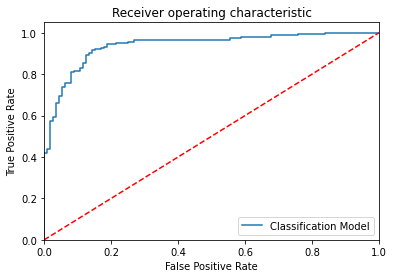

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1861072184.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


Confusion matrix : 
 [[144  20]
 [ 14  98]]
Outcome values : 
 144 20 14 98
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.88      0.89       164
           0       0.83      0.88      0.85       112

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

0.12318840579710146
Accuracy : 87.68 %
Precision : 91.1 %
Recall : 87.8 %
F1 Score : 0.894
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 87.6 %
MCC : MCC
roc_auc_score: 0.877


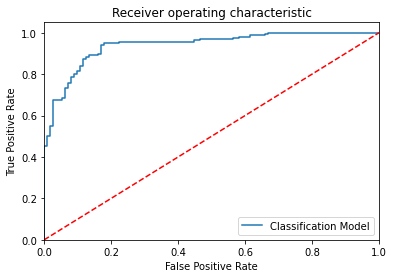

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[143  21]
 [ 14  98]]
Outcome values : 
 143 21 14 98
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.87      0.89       164
           0       0.82      0.88      0.85       112

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276

0.12681159420289856
Accuracy : 87.32 %
Precision : 91.1 %
Recall : 87.2 %
F1 Score : 0.891
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 87.4 %
MCC : MCC
roc_auc_score: 0.873


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1861072184.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


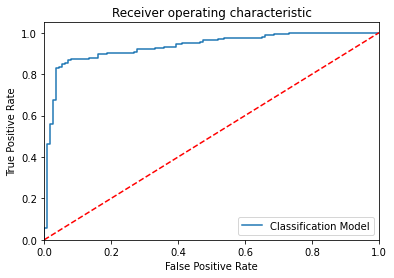

-----------------------------------------------------------------------------------------------------


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1861072184.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


In [47]:
ModelLR = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
ModelDC = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
ModelRF = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=20, min_samples_split=15,max_depth = 4,random_state = 0)
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    accuracy = accuracy_score(y_pred, y_test)
   # print('Model Score: ', score)
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    #accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt
    
    from sklearn.metrics import mean_absolute_error
    val_mae = mean_absolute_error(y_test, y_pred)
#y_pred, y_test
# uncomment following line to see the validation_mae
    print(val_mae)

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy,
               'RMSE':val_mae}
    result = result.append(new_row, ignore_index=True)
    

    # confusion matrix in sklearn

######   <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> MODELLING RESULT WITH VALIDATION:</div>

In [48]:
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,RMSE
0,"LogisticRegression(max_iter=1000, penalty='l1'...",141.0,23.0,12.0,100.0,0.873188,0.922,0.860,0.890,0.893,0.744,0.876307,0.876,0.126812
1,"DecisionTreeClassifier(max_depth=4, random_sta...",142.0,22.0,21.0,91.0,0.844203,0.871,0.866,0.869,0.812,0.677,0.839177,0.839,0.155797
2,"(DecisionTreeClassifier(max_depth=4, max_featu...",147.0,17.0,15.0,97.0,0.884058,0.907,0.896,0.902,0.866,0.760,0.881206,0.881,0.115942
3,"(ExtraTreeClassifier(random_state=1421747861),...",143.0,21.0,11.0,101.0,0.884058,0.929,0.872,0.899,0.902,0.765,0.886868,0.887,0.115942
4,"KNeighborsClassifier(leaf_size=1, n_neighbors=...",144.0,20.0,17.0,95.0,0.865942,0.894,0.878,0.886,0.848,0.723,0.863132,0.863,0.134058
5,SVC(probability=True),144.0,20.0,16.0,96.0,0.869565,0.900,0.878,0.889,0.857,0.731,0.867596,0.867,0.130435
6,(DecisionTreeClassifier(random_state=151452685...,134.0,30.0,16.0,96.0,0.833333,0.893,0.817,0.854,0.857,0.665,0.837108,0.837,0.166667
7,([DecisionTreeRegressor(criterion='friedman_ms...,139.0,25.0,13.0,99.0,0.862319,0.914,0.848,0.880,0.884,0.722,0.865745,0.866,0.137681
8,LGBMClassifier(),144.0,20.0,14.0,98.0,0.876812,0.911,0.878,0.894,0.875,0.747,0.876524,0.876,0.123188
9,GaussianNB(),143.0,21.0,14.0,98.0,0.873188,0.911,0.872,0.891,0.875,0.741,0.873476,0.874,0.126812


#### 
 

  <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> TOP 3 MODELS:</div>

In [49]:
top3=result.sort_values(by=['F1 Score','Accuracy','True Positive','True Negative'],ascending=False).reset_index(drop=True).head(3)
top3

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,RMSE
0,"(DecisionTreeClassifier(max_depth=4, max_featu...",147.0,17.0,15.0,97.0,0.884058,0.907,0.896,0.902,0.866,0.760,0.881206,0.881,0.115942
1,"(ExtraTreeClassifier(random_state=1421747861),...",143.0,21.0,11.0,101.0,0.884058,0.929,0.872,0.899,0.902,0.765,0.886868,0.887,0.115942
2,LGBMClassifier(),144.0,20.0,14.0,98.0,0.876812,0.911,0.878,0.894,0.875,0.747,0.876524,0.876,0.123188


In [ ]:
THE BEST MODEL FROM ABOVE IS RANDOM FOREST CLASSIFIER AND WOULD BE USED FOR DEPLOYMENT

In [51]:
ModelRF.fit(x_train,y_train)
y_pred=ModelRF.predict(x_test)
y_pred.shape

(276,)

In [52]:
out={'HeartFailure_Actual':y_test,'HeartFailure_Pred':y_pred}
out=pd.DataFrame(out)
df_bk = df.copy()
df_bk=df_bk.merge(out,left_index=True,right_index=True)
df_bk.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartFailure_Actual,HeartFailure_Pred
523,59,M,ASY,124,160,0,Normal,117,Y,1.0,Flat,1,1,1
519,63,M,ASY,96,305,0,ST,121,Y,1.0,Up,1,1,1
280,60,M,NAP,120,246,0,LVH,135,N,0.0,Up,0,0,0
120,47,F,NAP,135,248,1,Normal,170,N,0.0,Flat,1,1,0
298,51,M,ASY,110,0,1,Normal,92,N,0.0,Flat,1,1,1
464,59,M,NAP,131,0,0,Normal,128,Y,2.0,Down,1,1,1
547,61,M,TA,142,200,1,ST,100,N,1.5,Down,1,1,1
351,43,M,ASY,140,0,0,ST,140,Y,0.5,Up,1,1,1
254,55,M,ASY,145,248,0,Normal,96,Y,2.0,Flat,1,1,1
101,51,M,ASY,130,179,0,Normal,100,N,0.0,Up,0,0,0


##   <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> OUTPUT OF THE PREDICTED VALUES :</div>


In [92]:
df_bk

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartFailure_Actual,HeartFailure_Pred
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,0,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0,0,0
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0,0,0
23,44,M,ATA,150,288,0,Normal,150,Y,3.0,Flat,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1,1,1
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1,1,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1,1,0
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1,1


In [53]:
import pickle

In [54]:
filename = 'Random_Forest.sav'
pickle.dump(ModelRF, open(filename, 'wb'))